# Support Vector Machines 
## Exercise - Solutions

## Fraud in Wine

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

<img src="wine.jpg">

## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**TASK: Your overall goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features. Complete the tasks below to follow along with the project.**

---
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('..\data\wine_fraud.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
df.shape

(6497, 13)

In [5]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [7]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

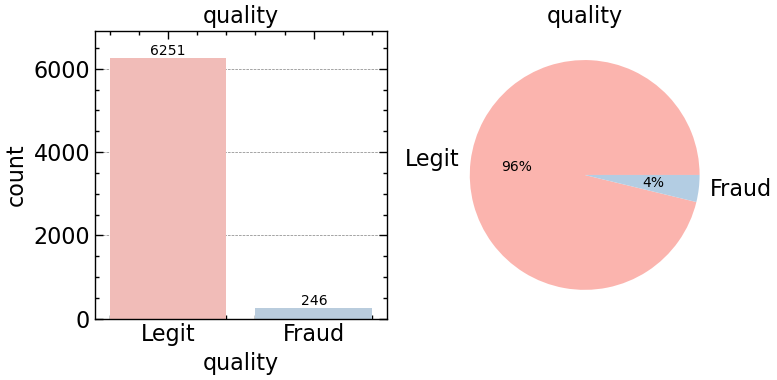

In [8]:
plt.style.use(['science','notebook','grid'])

variable = 'quality'
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)

ax = sns.countplot(x=variable, data= df, palette='Pastel1')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height +80, 
            s = '{:.0f}'.format(height), 
            ha = 'center'
           )
plt.title(variable)
plt.ylim(0, 6900)

# pie chart
plt.subplot(1,2,2)
counts = df[variable].value_counts()
colors = sns.color_palette('Pastel1')
plt.pie(counts, labels= counts.index, colors=colors, autopct='%0.f%%')
plt.title(variable)


plt.tight_layout()
plt.show()



Dari dilihat dari grafik menjukan data kit cenderung unblanance `Legit sebanyak 96%` sedangkan `Fraud 4%`

In [9]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

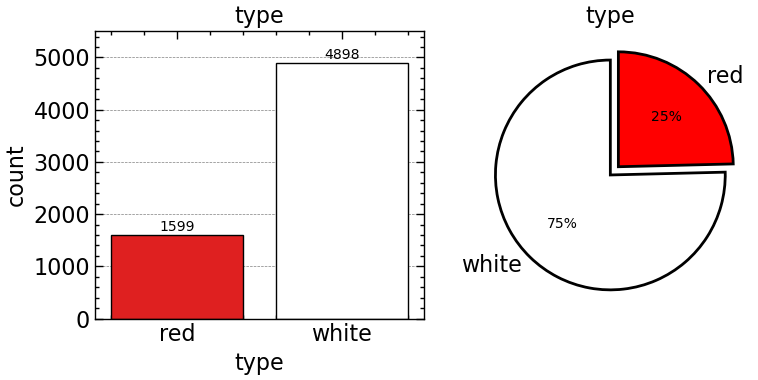

In [10]:
variable = 'type'

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)

ax = sns.countplot(x = variable, data= df, palette= ['red', 'white'], edgecolor='k')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height + 80, 
            s = '{:.0f}'.format(height),
            ha = 'center'
           )
plt.ylim(0, 5500)
plt.title(variable)

# pie chart

plt.subplot(1,2,2)
counts = df[variable].value_counts()
colors = sns.color_palette(['white', 'red'])
wedgeprops = {"edgecolor" : "black",
              'linewidth': 2,
              'antialiased': True}
explode = [0, 0.1] 
plt.pie(counts, labels = counts.index, colors=colors,  wedgeprops= wedgeprops, autopct='%0.f%%',  startangle=90, explode=explode)
plt.title(variable)

plt.tight_layout()
plt.show()

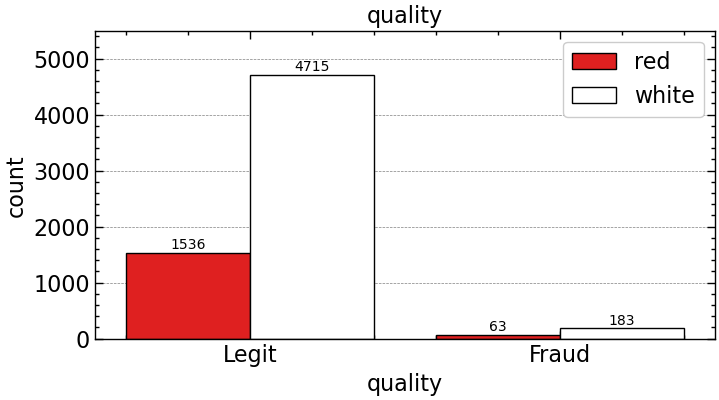

In [11]:
variable = 'quality'

plt.figure(figsize=(8,4))
ax = sns.countplot(x = variable, data= df, hue='type',palette= ['red', 'white'], edgecolor='k')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height + 80, 
            s = '{:.0f}'.format(height),
            ha = 'center'
           )
plt.ylim(0, 5500)
plt.title(variable)
plt.legend(loc='best')

plt.show()

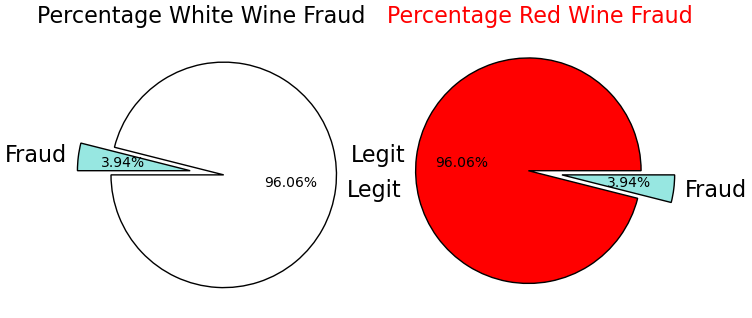

In [12]:

plt.subplot(1,2,1)
type_red =  df[df['type'] == 'red']
counts = type_red['quality'].value_counts()
wedgeprops = {"edgecolor" : "black",
              'linewidth': 1,
              'antialiased': True}
explode = [0.2, 0.1] 
plt.pie(counts, colors=['white','#97E7E1'], autopct='%0.2f%%', labels = counts.index, wedgeprops= wedgeprops, explode= explode,  startangle=180)
plt.title("Percentage White Wine Fraud");


plt.subplot(1,2,2)
type_white =  df[df['type'] == 'white']
counts = type_red['quality'].value_counts()
wedgeprops = {"edgecolor" : "black",
              'linewidth': 1,
              'antialiased': True}
explode = [0.1, 0.2] 
plt.pie(counts, colors=['red','#97E7E1'], autopct='%0.2f%%', labels = counts.index, wedgeprops= wedgeprops, explode= explode)
plt.title("Percentage Red Wine Fraud",color='red');

In [13]:
# count correlation
df['Fraud'] = df['quality'].map({'Legit':1, 'Fraud':0})

In [14]:
df.corr()['Fraud'].sort_values()

volatile acidity       -0.151228
chlorides              -0.034499
fixed acidity          -0.021794
pH                     -0.020107
density                -0.016351
sulphates               0.034046
total sulfur dioxide    0.035252
residual sugar          0.048756
alcohol                 0.051141
citric acid             0.061789
free sulfur dioxide     0.085204
Fraud                   1.000000
Name: Fraud, dtype: float64

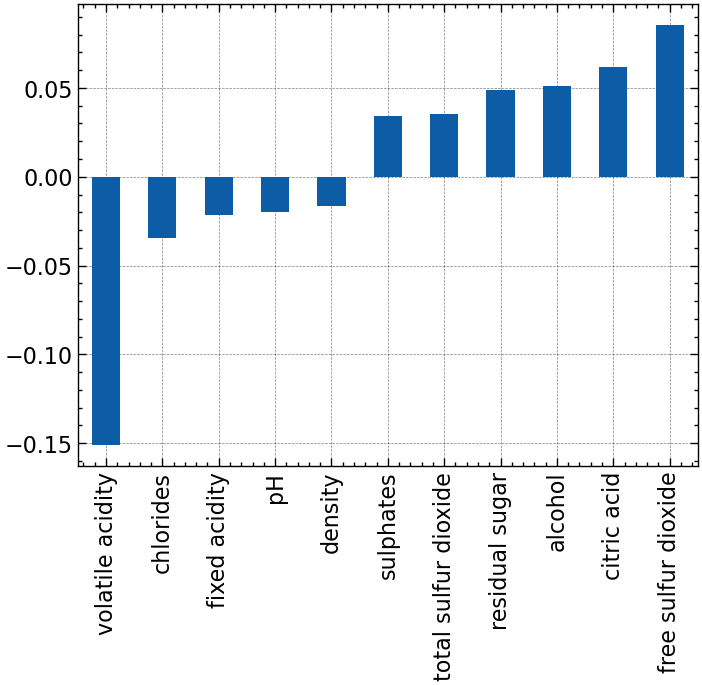

In [15]:
df.corr()['Fraud'][:-1].sort_values().plot(kind='bar');

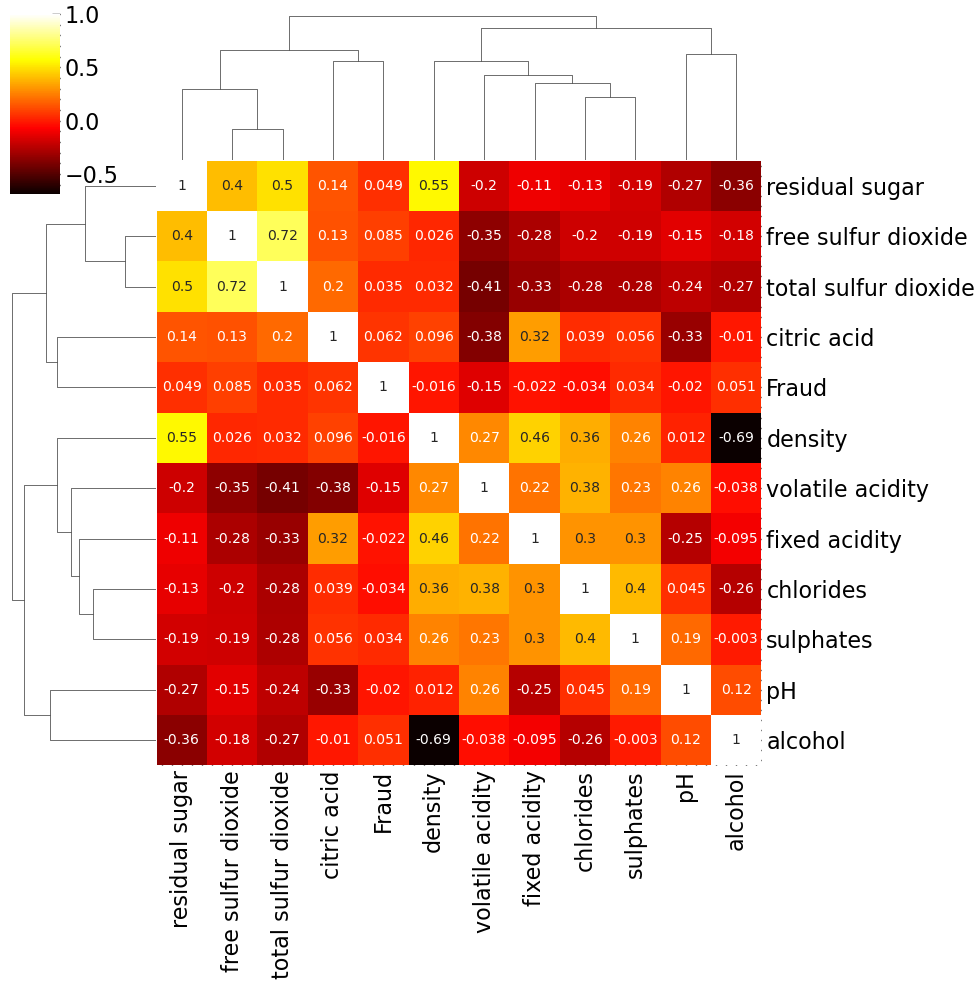

In [16]:
sns.clustermap(df.corr(), cmap='hot', annot=True);

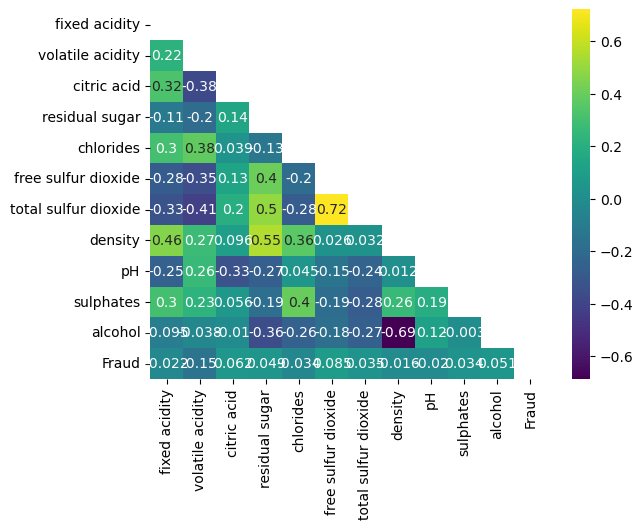

In [17]:
plt.style.use('default')
# matrix 
matrix = df.corr()

# mask
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)]=True

# corr
sns.heatmap(matrix, mask=mask, annot=True, cmap='viridis');

In [18]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,1


In [19]:
df = df.drop('Fraud', axis=1)

In [20]:
df['type'] = pd.get_dummies(df['type'], drop_first = True)

In [21]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0


## Create X and y

In [22]:
X = df.drop('quality', axis = 1)
y = df['quality']

## Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

## Scale data

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

## Create Support Vector Machine and GridSearchCV

In [29]:
from sklearn.svm import SVC

In [31]:
svc = SVC(class_weight = 'balanced')

In [32]:
param_grid = {'C' : [0.01, 0.1,0.5, 0.9, 1], 
              'gamma' : ['scale','auto']}

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
grid_model = GridSearchCV(svc, param_grid)

In [35]:
grid_model.fit(X_train_scaler,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1],
                         'gamma': ['scale', 'auto']})

In [38]:
grid_model.best_params_

{'C': 1, 'gamma': 'auto'}

In [36]:
grid_model.best_score_

0.8546294955875794

In [39]:
predictions = grid_model.predict(X_test_scaler)

## Evaluation Metrics

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [42]:
confusion_matrix(y_test, predictions)

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

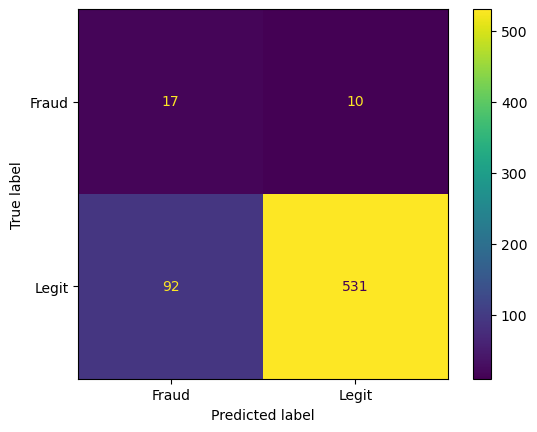

In [46]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test_scaler, y_test);

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



## Evaluation Curve

In [50]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

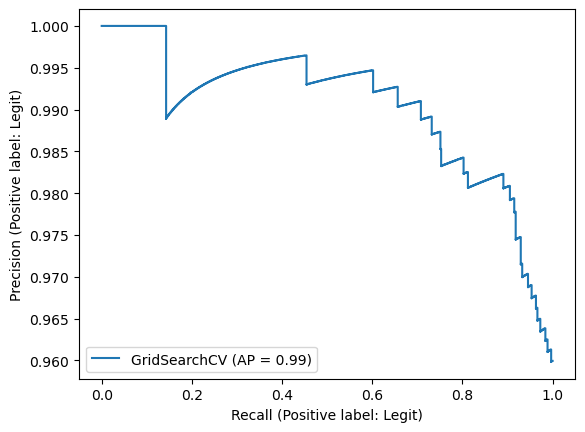

In [49]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test_scaler, y_test);

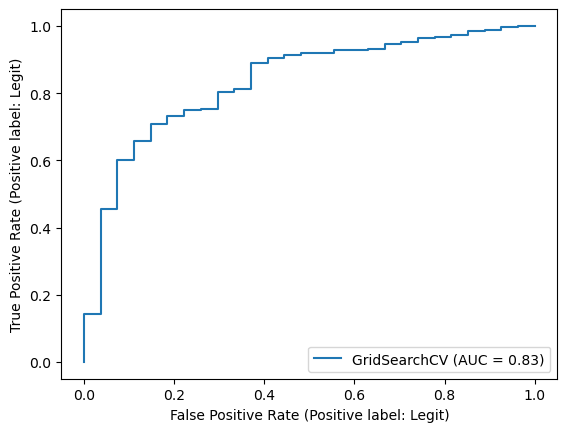

In [51]:
RocCurveDisplay.from_estimator(grid_model, X_test_scaler, y_test);